In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import openml
import warnings
warnings.filterwarnings("ignore")

: 

# New Cifar Scatter plot

In [32]:
max_shape_to_run = 10000
name_size_dict = {}
SUITE_ID = [334, 337]
for i in SUITE_ID:
    benchmark_suite = openml.study.get_suite(i)
    for task_id in benchmark_suite.tasks:  # iterate over all tasks
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        dataset = task.get_dataset()
        X, y, categorical_indicator, attribute_names = dataset.get_data(
            dataset_format="dataframe", target=dataset.default_target_attribute
        )   

        key = os.path.join(dataset.name, str(i))
        if X.shape[0] > max_shape_to_run:
            size = max_shape_to_run
        else:
            size = X.shape[0]
        name_size_dict[key] = size
        # dataset_name.append(dataset.name)

In [26]:
# name_size_dict

In [39]:
# name_to_index = {}
# name_to_acc = {}
def obtain_result(path, dic1, dic2):
    for dataset_ids in os.listdir(path):
        dataset_id_path = os.path.join(path, dataset_ids)
        for dataset_id in os.listdir(dataset_id_path):
            dataset_path = os.path.join(dataset_id_path, dataset_id)
            acc_file_path = os.path.join(dataset_path, 'acc_df.json')
            acc_tuned_file_path = os.path.join(dataset_path, 'acc_tuned_1hr.json')

            if os.path.exists(acc_file_path):
                with open(acc_file_path, 'r') as f:
                    acc_data_df = json.load(f)
                    
            if os.path.exists(acc_tuned_file_path):
                with open(acc_tuned_file_path, 'r') as g:
                    acc_data_tuned = json.load(g)


            key = os.path.join(dataset_id, dataset_ids)
            dic1[key] = acc_data_df
            dic2[key] = acc_data_tuned
            

In [40]:
rf_directory = "../benchmarks/tabular/new_results/rf"
xgbt_directory = "../benchmarks/tabular/new_results/xgbt"
tab_directory = "../benchmarks/tabular/new_results/tabnet"

In [44]:
rf_results_df = {}
rf_results_tuned = {}
obtain_result(rf_directory, rf_results_df, rf_results_tuned)

xgbt_results_df = {}
xgbt_results_tuned = {}
obtain_result(xgbt_directory, xgbt_results_df, xgbt_results_tuned)

tab_results_df = {}
tab_results_tuned = {}
obtain_result(tab_directory, tab_results_df, tab_results_tuned)

# RF

['Bioresponse/337', 'compas-two-years/334', 'eye_movements/334', 'eye_movements/337', 'electricity/334', 'covertype/334', 'albert/334', 'default-of-credit-card-clients/334', 'road-safety/334', 'credit/337', 'electricity/337', 'covertype/337', 'pol/337', 'house_16H/337', 'MagicTelescope/337', 'bank-marketing/337', 'MiniBooNE/337', 'Higgs/337', 'Diabetes130US/337', 'jannis/337', 'default-of-credit-card-clients/337', 'california/337', 'heloc/337']


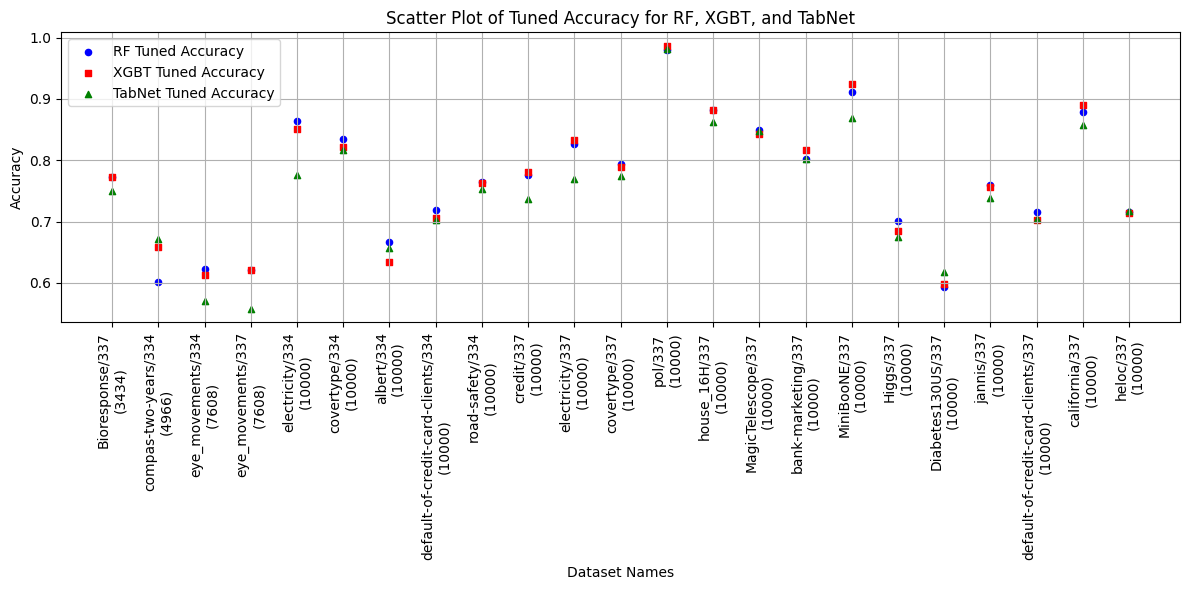

In [62]:
sorted_names = sorted(name_size_dict, key=name_size_dict.get)
print(sorted_names)
sorted_names_with_sizes = [f'{name}\n({name_size_dict[name]})' for name in sorted_names]
rf_accuracies = [rf_results_tuned[name] for name in sorted_names]
xgbt_accuracies = [xgbt_results_tuned[name] for name in sorted_names]
tabnet_accuracies = [tab_results_tuned[name] for name in sorted_names]

x_positions = range(len(sorted_names))
plt.figure(figsize=(12, 6))

plt.scatter(x_positions, rf_accuracies, color='blue', label='RF Tuned Accuracy', s=20, marker='o')
plt.scatter(x_positions, xgbt_accuracies, color='red', label='XGBT Tuned Accuracy', s=20, marker='s')
plt.scatter(x_positions, tabnet_accuracies, color='green', label='TabNet Tuned Accuracy', s=20, marker='^')
plt.xticks(x_positions, sorted_names_with_sizes, rotation=90)
plt.xlabel('Dataset Names')
plt.ylabel('Accuracy')
plt.title('Scatter Plot of Tuned Accuracy for RF, XGBT, and TabNet')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

['Bioresponse/337', 'compas-two-years/334', 'eye_movements/334', 'eye_movements/337', 'electricity/334', 'covertype/334', 'albert/334', 'default-of-credit-card-clients/334', 'road-safety/334', 'credit/337', 'electricity/337', 'covertype/337', 'pol/337', 'house_16H/337', 'MagicTelescope/337', 'bank-marketing/337', 'MiniBooNE/337', 'Higgs/337', 'Diabetes130US/337', 'jannis/337', 'default-of-credit-card-clients/337', 'california/337', 'heloc/337']


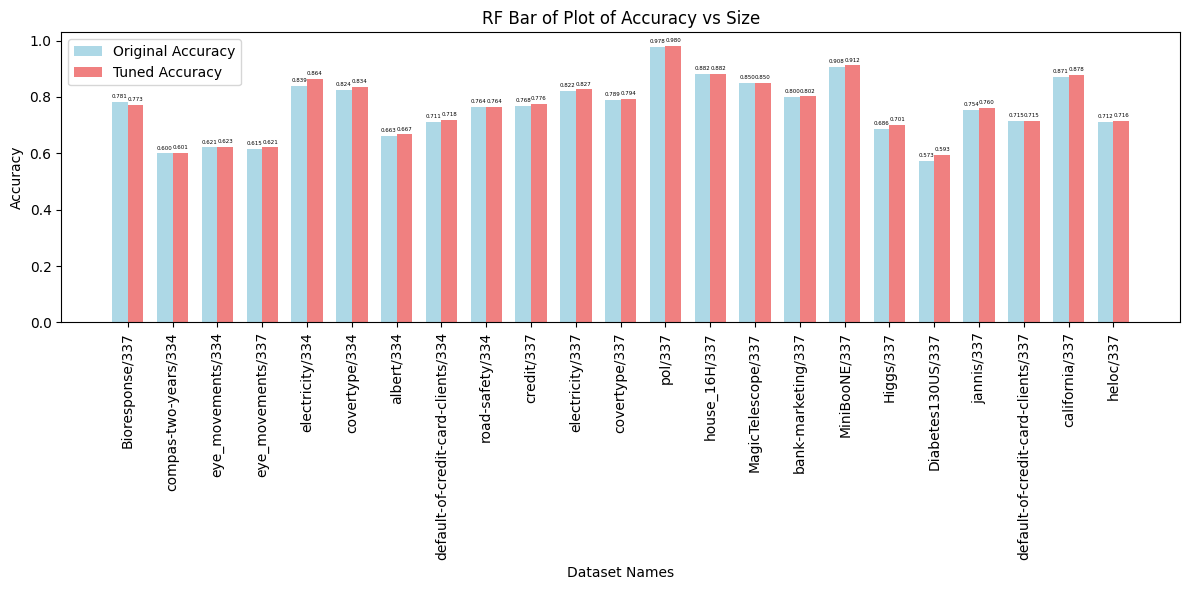

In [54]:
sorted_names = sorted(name_size_dict, key=name_size_dict.get)
print(sorted_names)
sorted_accuracies_df = [rf_results_df[name] for name in sorted_names]
sorted_accuracies_tuned = [rf_results_tuned[name] for name in sorted_names]

plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions = range(len(sorted_names))

bars1 = plt.bar(bar_positions, sorted_accuracies_df, width=bar_width, label='Original Accuracy', color='lightblue')
bars2 = plt.bar([pos + bar_width for pos in bar_positions], sorted_accuracies_tuned, width=bar_width, label='Tuned Accuracy', color='lightcoral')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=4)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=4)

plt.xlabel('Dataset Names')
plt.ylabel('Accuracy')
plt.title('RF Bar of Plot of Accuracy vs Size')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], sorted_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()